**Analysis Without Emosent library**

In [2]:
import pandas as pd

# Paths to the CSV files
comment_interactions_path = '/content/drive/MyDrive/emojis/commentInteractions_cleaned.csv'
emoji_frequency_matrix_path = '/content/drive/MyDrive/emojis/comments2emoji_frequency_matrix_cleaned.csv'
ijstable_path = '/content/drive/MyDrive/emojis/ijstable.csv'
votes_path = '/content/drive/MyDrive/emojis/votes_cleaned.csv'
reader_writer_path = '/content/drive/MyDrive/emojis/__readervswriter.csv'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Load datasets
comment_interactions_df = pd.read_csv(comment_interactions_path)
emoji_frequency_matrix_df = pd.read_csv(emoji_frequency_matrix_path)
ijstable_df = pd.read_csv(ijstable_path)
votes_df = pd.read_csv(votes_path)
reader_writer_df = pd.read_csv(reader_writer_path)

In [25]:
# Define emoji sentiment scores
emoji_sentiment_scores = reader_writer_df.set_index('emoji')['s.reader'].to_dict()

# Identify emoji columns in the frequency matrix
emoji_columns = [col for col in emoji_frequency_matrix_df.columns if col.startswith('X')]

# Create a mapping of emoji columns to their sentiment scores
emoji_sentiment_mapping = {emoji: emoji_sentiment_scores.get(emoji, 0) for emoji in emoji_columns}

# Filter the emoji frequency matrix to include only relevant emoji columns
filtered_emoji_freq_matrix = emoji_frequency_matrix_df[emoji_columns]

# Multiply the frequency of each emoji by its sentiment score
sentiment_scores = filtered_emoji_freq_matrix.multiply(list(emoji_sentiment_mapping.values()), axis=1)

# Sum the sentiment scores for each comment to get the overall sentiment score
emoji_frequency_matrix_df['optimized_sentiment_score'] = sentiment_scores.sum(axis=1)

# Display the DataFrame with sentiment scores
print(emoji_frequency_matrix_df[['commentId', 'optimized_sentiment_score']].head(50))

                   commentId  optimized_sentiment_score
0   5948d8db0ed1a60004c38f6e                      0.000
1   5949012f0ed1a60004c390b8                      0.000
2   594a44e10af0930004ad2f4e                      0.000
3   594be7bdbde6370004cfaf44                      0.000
4   594d1f4bdabcef0004334a02                      0.000
5   594d1f5cdabcef0004334a04                      0.000
6   5950f66cd4e9f8000419da14                      0.000
7   595125c1d4e9f8000419db8f                      0.000
8   595128ded4e9f8000419db9a                      0.000
9   595261d00ba2ae0004b1587f                      0.000
10  5953cc7ccd188c00044295a6                      0.734
11  595542f55ee8740004a28dc7                      0.000
12  5955cc92f19e4600042419e4                      0.000
13  5955f584f19e460004241a2b                      0.000
14  5956005ff19e460004241a4f                      0.000
15  595642e2f19e460004241bc9                      0.563
16  595782a14dc14b000488b0be                    

In [26]:
print(emoji_frequency_matrix_df)

       Unnamed: 0  id                       coa                 commentId  \
0               1   7  58b5f7cb917c350004dc0b09  5948d8db0ed1a60004c38f6e   
1               2   8  58b5f7cb917c350004dc0b09  5949012f0ed1a60004c390b8   
2               3   1  58b5f7cb917c350004dc0b09  594a44e10af0930004ad2f4e   
3               4   5  58b5f7cb917c350004dc0b09  594be7bdbde6370004cfaf44   
4               5   5  58b5f7cb917c350004dc0b09  594d1f4bdabcef0004334a02   
...           ...  ..                       ...                       ...   
63694       72126  15  5967a6d0fc71a50004e42647  59962346324897000451dfcc   
63695       72127  80  5967a6d0fc71a50004e42647  59963255324897000451dfe6   
63696       72128  70  5967a6d0fc71a50004e42647  5996b354324897000451e0ae   
63697       72129  31  5967a6d0fc71a50004e42647  599c4fcf32355400048097d3   
63698       72130  17  5967a6d0fc71a50004e42647  599d3e9e3479ac0004e85320   

                                                     txt  like  nolike  \
0

In [27]:
print(emoji_frequency_matrix_df.columns)

Index(['Unnamed: 0', 'id', 'coa', 'commentId', 'txt', 'like', 'nolike', 'date',
       'uid', 'nchar',
       ...
       'X1f41e', 'X1f41d', 'X1f41f', 'X1f41a', 'X1f95d', 'X1f959', 'X1f982',
       'total.emojiCount', 'uiddate', 'optimized_sentiment_score'],
      dtype='object', length=359)


**Data Preprocessing and Tokenization**

In [28]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Remove of unnecessary columns
df = emoji_frequency_matrix_df[['txt', 'optimized_sentiment_score']]

# Remove NaN values
df = df.dropna(subset=['txt', 'optimized_sentiment_score'])

# Tokenization
df['tokens'] = df['txt'].apply(word_tokenize)

# Lowercasing
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])

# Remove punctuation
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in string.punctuation])

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the preprocessed DataFrame
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                    txt  optimized_sentiment_score  \
0                                  good                        0.0   
1  Nervous tachycardia all the day long                        0.0   
2                                 Tired                        0.0   
3                    Напряжённый денёк                         0.0   
4           Сегодня пяяяятница&#x1f601;                        0.0   

                              tokens  
0                             [good]  
1  [nervous, tachycardia, day, long]  
2                            [tired]  
3               [напряжённый, денёк]  
4      [сегодня, пяяяятница, x1f601]  


In [9]:
print(df.columns)

Index(['txt', 'optimized_sentiment_score', 'tokens'], dtype='object')


In [29]:
!pip install nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Sentiment Lexicons
sia = SentimentIntensityAnalyzer()
#df['positive_words'] = df['tokens'].apply(lambda x: len([word for word in x if sia.polarity_scores(word)['compound'] > 0]))
#df['negative_words'] = df['tokens'].apply(lambda x: len([word for word in x if sia.polarity_scores(word)['compound'] < 0]))



def get_sentiment_category(score):
    if score == 0:
        return 'Neutral'
    elif score > 0 and score < 0.5:
        return 'Positive'
    elif score >= 0.5:
        return 'Very Positive'
    elif score < 0 and score > -0.5:
        return 'Negative'
    elif score <= -0.5:
        return 'Very Negative'
    else:
        return 'Unknown'

df['positive_words'] = df['tokens'].apply(lambda x: len([word for word in x if get_sentiment_category(sia.polarity_scores(word)['compound']) == 'Positive']))
df['negative_words'] = df['tokens'].apply(lambda x: len([word for word in x if get_sentiment_category(sia.polarity_scores(word)['compound']) == 'Negative']))
df['neutral_words'] = df['tokens'].apply(lambda x: len([word for word in x if get_sentiment_category(sia.polarity_scores(word)['compound']) == 'Neutral']))
df['very_positive_words'] = df['tokens'].apply(lambda x: len([word for word in x if get_sentiment_category(sia.polarity_scores(word)['compound']) == 'Very Positive']))
df['very_negative_words'] = df['tokens'].apply(lambda x: len([word for word in x if get_sentiment_category(sia.polarity_scores(word)['compound']) == 'Very Negative']))



In [31]:
print(df)
print(df.columns)

                                                     txt  \
0                                                   good   
1                   Nervous tachycardia all the day long   
2                                                  Tired   
3                                     Напряжённый денёк    
4                            Сегодня пяяяятница&#x1f601;   
...                                                  ...   
63694  Todo mi apoyo a la gente de Barcelona en un dí...   
63695                        No hace falta aclarar nada.   
63696                             Barcelona t&#39;estimo   
63697  Y en agosto se supone que baja la carga de tra...   
63698                                        A topeeeeee   

       optimized_sentiment_score  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            0.0   
...                          ...   
63694                      

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_category(score):
    if score == 0:
        return 'Neutral'
    elif score > 0 and score < 0.5:
        return 'Positive'
    elif score >= 0.5:
        return 'Very Positive'
    elif score < 0 and score > -0.5:
        return 'Negative'
    elif score <= -0.5:
        return 'Very Negative'
    else:
        return 'Unknown'

df['sentiment_category'] = df['tokens'].apply(lambda x: get_sentiment_category(sum(sia.polarity_scores(word)['compound'] for word in x) / len(x) if len(x) > 0 else 0))


# DataFrame with the new column
print(df.head())


                                    txt  optimized_sentiment_score  \
0                                  good                        0.0   
1  Nervous tachycardia all the day long                        0.0   
2                                 Tired                        0.0   
3                    Напряжённый денёк                         0.0   
4           Сегодня пяяяятница&#x1f601;                        0.0   

                              tokens  positive_words  negative_words  \
0                             [good]               1               0   
1  [nervous, tachycardia, day, long]               0               1   
2                            [tired]               0               1   
3               [напряжённый, денёк]               0               0   
4      [сегодня, пяяяятница, x1f601]               0               0   

   neutral_words  very_positive_words  very_negative_words sentiment_category  
0              0                    0                    0        

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# features and target variable# features and target variable
X = df[['positive_words', 'negative_words','very_positive_words','very_negative_words','neutral_words']]

y = df['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9930926216640502
               precision    recall  f1-score   support

     Negative       0.98      0.96      0.97      1467
      Neutral       1.00      1.00      1.00      8622
     Positive       0.98      0.99      0.98      2618
Very Negative       1.00      1.00      1.00         6
Very Positive       1.00      0.85      0.92        27

     accuracy                           0.99     12740
    macro avg       0.99      0.96      0.98     12740
 weighted avg       0.99      0.99      0.99     12740



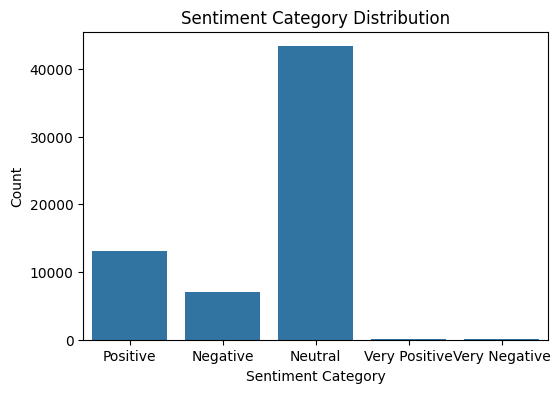

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of sentiment categories
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()




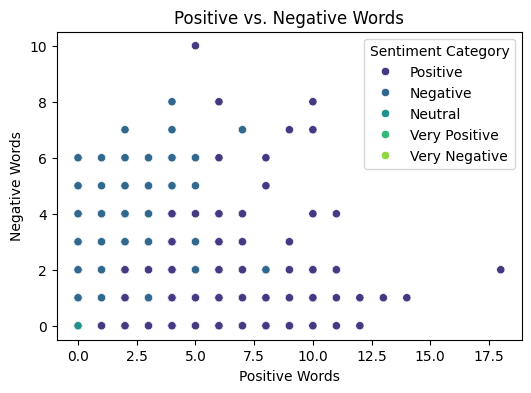

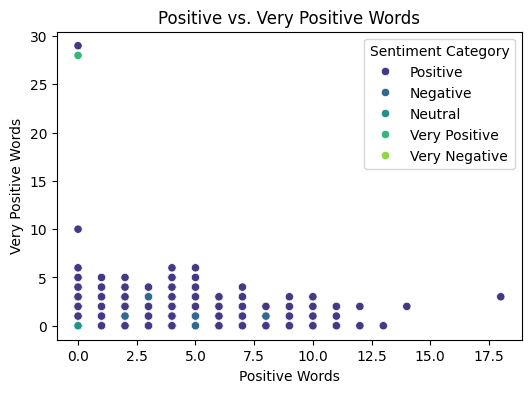

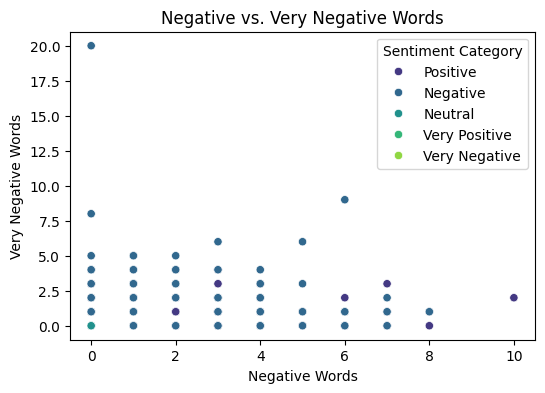

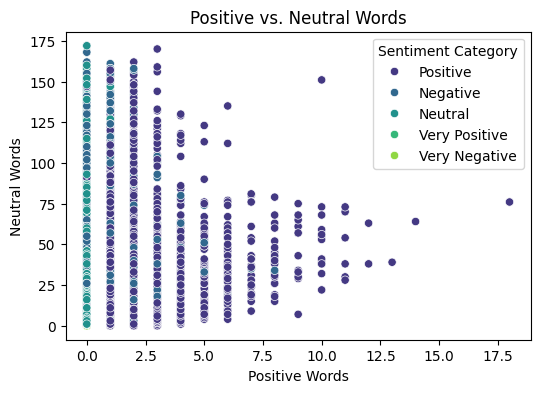

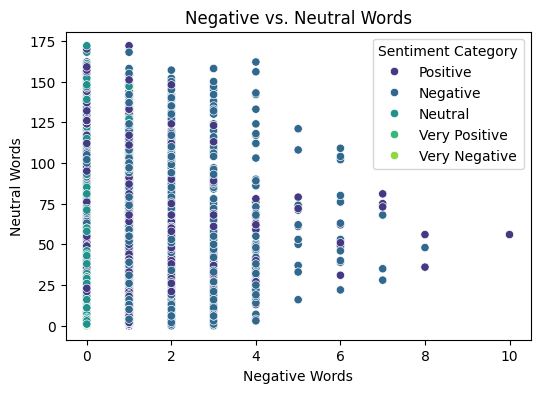

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains the necessary columns)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='positive_words', y='negative_words', hue='sentiment_category', data=df, palette='viridis', legend='full')
plt.title('Positive vs. Negative Words')
plt.xlabel('Positive Words')
plt.ylabel('Negative Words')
plt.legend(title='Sentiment Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='positive_words', y='very_positive_words', hue='sentiment_category', data=df, palette='viridis', legend='full')
plt.title('Positive vs. Very Positive Words')
plt.xlabel('Positive Words')
plt.ylabel('Very Positive Words')
plt.legend(title='Sentiment Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='negative_words', y='very_negative_words', hue='sentiment_category', data=df, palette='viridis', legend='full')
plt.title('Negative vs. Very Negative Words')
plt.xlabel('Negative Words')
plt.ylabel('Very Negative Words')
plt.legend(title='Sentiment Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='positive_words', y='neutral_words', hue='sentiment_category', data=df, palette='viridis', legend='full')
plt.title('Positive vs. Neutral Words')
plt.xlabel('Positive Words')
plt.ylabel('Neutral Words')
plt.legend(title='Sentiment Category')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='negative_words', y='neutral_words', hue='sentiment_category', data=df, palette='viridis', legend='full')
plt.title('Negative vs. Neutral Words')
plt.xlabel('Negative Words')
plt.ylabel('Neutral Words')
plt.legend(title='Sentiment Category')
plt.show()


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=100)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9934850863422292
Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

     Negative       0.99      0.96      0.98      1467
      Neutral       1.00      1.00      1.00      8622
     Positive       0.98      0.99      0.99      2618
Very Negative       0.00      0.00      0.00         6
Very Positive       0.88      0.85      0.87        27

     accuracy                           0.99     12740
    macro avg       0.77      0.76      0.77     12740
 weighted avg       0.99      0.99      0.99     12740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Initialize and train Support Vector Machine (SVM) model
svm_model = SVC(random_state=100)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nSupport Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_y_pred))



Support Vector Machine Accuracy: 0.9793563579277865
Support Vector Machine Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

     Negative       0.94      0.93      0.94      1467
      Neutral       0.99      1.00      0.99      8622
     Positive       0.96      0.97      0.96      2618
Very Negative       0.00      0.00      0.00         6
Very Positive       0.00      0.00      0.00        27

     accuracy                           0.98     12740
    macro avg       0.58      0.58      0.58     12740
 weighted avg       0.98      0.98      0.98     12740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


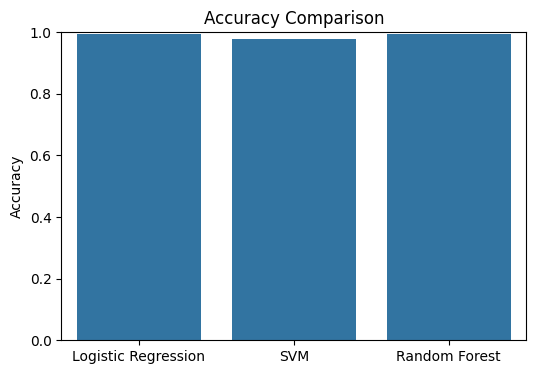

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for Logistic Regression
rm_cm = confusion_matrix(y_test, y_pred)


# Calculate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_y_pred)

# Calculate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_pred)



# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Logistic Regression', 'SVM', 'Random Forest'], y=[lr_accuracy, svm_accuracy, accuracy])
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


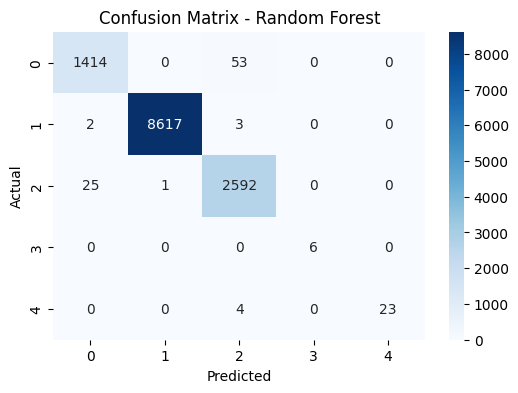

In [46]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rm_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

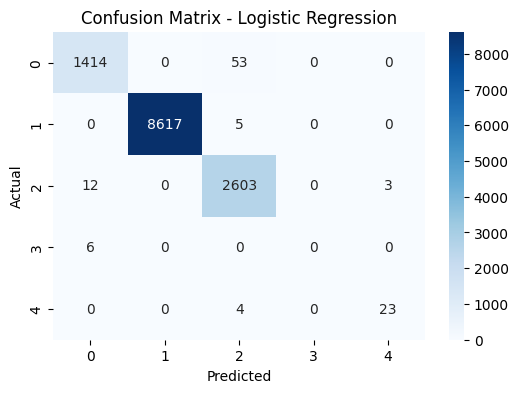

In [47]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



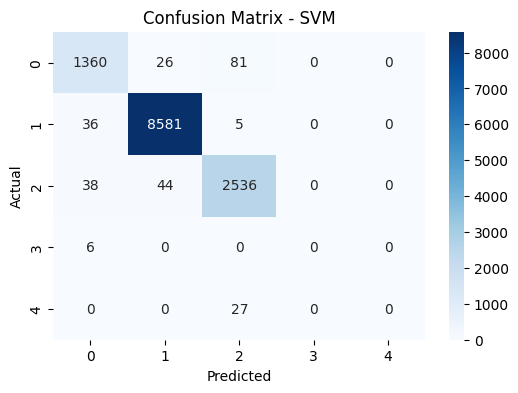

In [48]:
# Plot confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()